In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as skl
import os
from sklearn.model_selection import train_test_split as _split
import logging as _log
_logger = _log.getLogger(__name__)
_logger.setLevel(_log.INFO)
sns.set()

In [2]:
data = pd.read_csv("../data/dataset.csv", sep=",")

In [3]:
data

,height,width,depth,weight,activity
0,90.5,42.0,2.0,1.25,mlp
1,60.0,50.0,2.0,1.20,mlp
2,80.0,59.6,2.0,7.40,mlp
3,46.0,46.0,2.0,1.45,mlp
4,93.0,21.0,2.0,1.30,mlp
...,...,...,...,...,...
895,81.0,295.0,175.0,84.00,meuble
896,100.0,170.0,207.0,41.00,meuble
897,125.0,200.0,215.0,96.30,meuble
898,80.0,270.0,270.0,93.00,meuble


<AxesSubplot:>

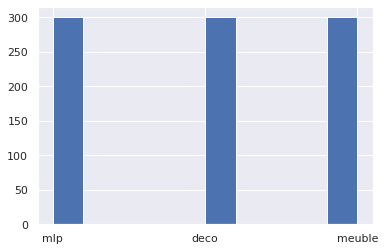

In [43]:
data['activity'].hist()

In [44]:
data['volume'] = np.log(data['height'] * data['width'] * data['depth'])
data['density'] = np.log(data['weight'] / data['height'] * data['width'] * data['depth'])
data['weight'] = np.log(data['weight'])

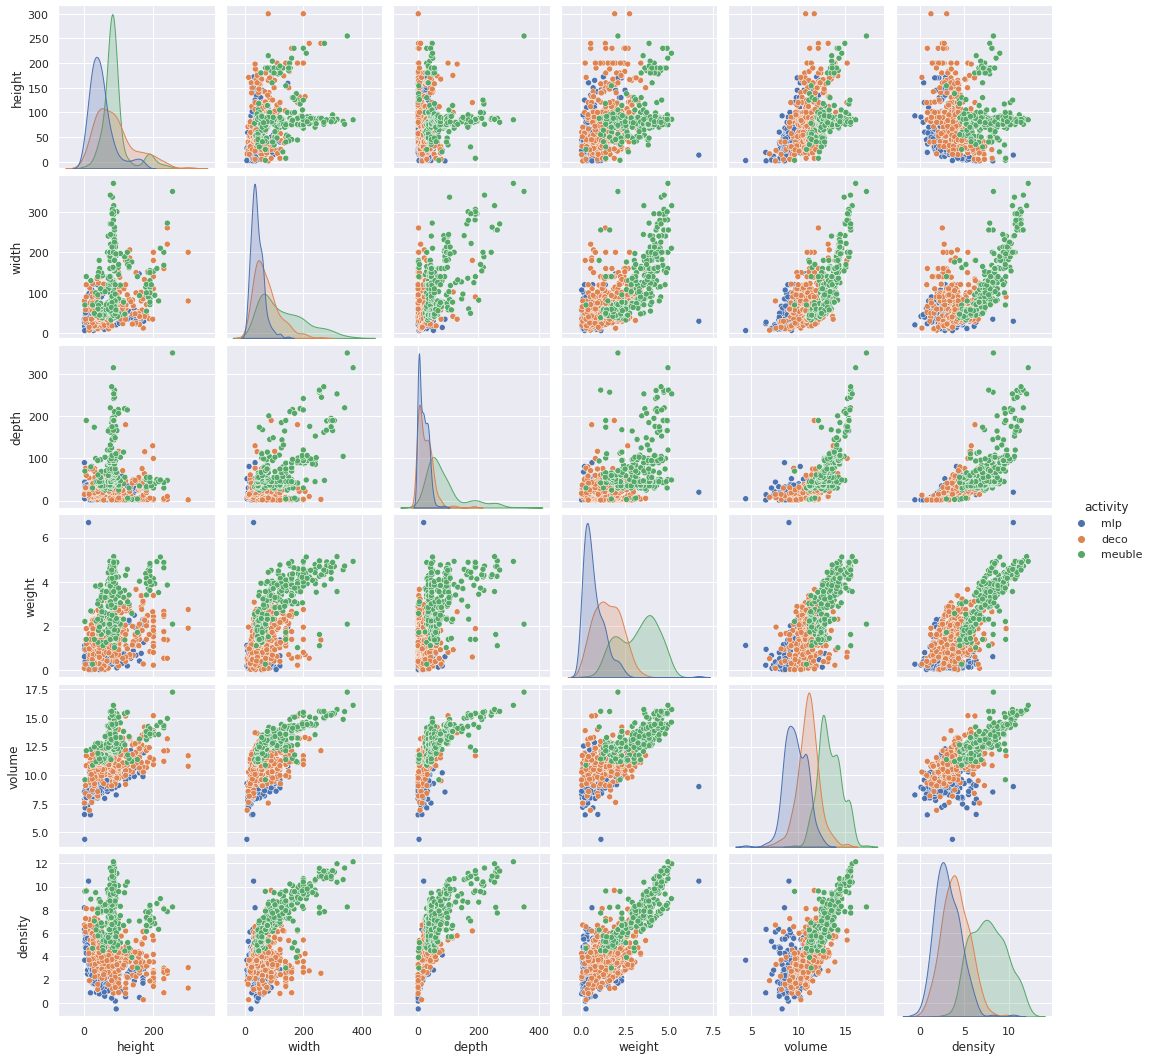

In [45]:
sns.pairplot(data, hue='activity')

In [16]:
def import_data(path, filename):
    return pd.read_csv(os.path.join(path, filename), sep=",")
    
def preprocess_data(data):
    data['volume'] = np.log(data['height'] * data['width'] * data['depth'])
    data['density'] = np.log(data['weight']) / data['volume']
    data['weight'] = np.log(data['weight'])
    return data

def split_data(data, pct_test=0.2):
    train, test = _split(data, test_size=pct_test)
    dev, test = _split(test, test_size=0.5)
    return train, dev, test

In [13]:
train, test = _split(data, test_size=0.2)

In [14]:
dev, test = _split(test, test_size=0.5)

In [22]:
print(len(train))
print(len(dev))
print(len(test))

720
90
90


In [33]:
_logger.info("train size : {0}".format(len(train)))
_logger.info("dev size : {0}".format(len(dev)))
_logger.info("test size : {0}".format(len(test)))

INFO:__main__:train size : 720
INFO:__main__:dev size : 90
INFO:__main__:test size : 90


In [24]:
print("train size : {0}".format(len(train)))

train size : 720


In [34]:
np.log(90) / np.log(80)

1.026878667218587

In [35]:
90 / 80

1.125

In [36]:
np.log(90 / 80)

0.11778303565638346